#Automatic Text Generation

Automatic text generation is the generation of natural language texts by computer. It has applications in automatic documentation systems, automatic letter writing, automatic report generation, etc. In this project, we are going to generate words given a set of input words. We are going to train the LSTM model using William Shakespeare’s writings

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/lstm.png" width="1200">

- Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory.
- Generally LSTM is composed of a cell (the memory part of the LSTM unit) and three “regulators”, usually called gates, of the flow of information inside the LSTM unit: an input gate, an output gate and a forget gate.
- Intuitively, the cell is responsible for keeping track of the dependencies between the elements in the input sequence.
- The input gate controls the extent to which a new value flows into the cell, the forget gate controls the extent to which a value remains in the cell and the output gate controls the extent to which the value in the cell is used to compute the output activation of the LSTM unit.
- The activation function of the LSTM gates is often the logistic sigmoid function.
- There are connections into and out of the LSTM gates, a few of which are recurrent. The weights of these connections, which need to be learned during training, determine how the gates operate

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/shakespeare2.jpg" width="1200">

In [1]:
# tensorflow 2.x
import tensorflow as tf
import string
import requests

import warnings
warnings.filterwarnings("ignore")

In [2]:
response = requests.get('https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt')

In [3]:
#first 1500 characters
response.text[:1500]

'This is the 100th Etext file presented by Project Gutenberg, and\nis presented in cooperation with World Library, Inc., from their\nLibrary of the Future and Shakespeare CDROMS.  Project Gutenberg\noften releases Etexts that are NOT placed in the Public Domain!!\n\nShakespeare\n\n*This Etext has certain copyright implications you should read!*\n\n<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM\nSHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS\nPROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE\nWITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE\nDISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS\nPERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED\nCOMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY\nSERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>\n\n*Project Gutenberg is proud to cooperate with The World Library*\nin the presentation of The Complete Works of William Shakespeare\nfor your

In [4]:
#Now we are going to split the text with respect to \n.
data = response.text.split('\n')
data[0]

'This is the 100th Etext file presented by Project Gutenberg, and'

In [5]:
#The text file contains a header file before the actual data begins. The actual data begins from line 253. So we are going to slice the data and retain everything from line 253 onwards.
data = data[253:]
data[0]

'  From fairest creatures we desire increase,'

In [6]:
# how many lines?
len(data)

124204

In [7]:
# Now we are going to join all the lines and create a long string consisting of the data in continuous format
data = " ".join(data)
data[:1000]


"  From fairest creatures we desire increase,   That thereby beauty's rose might never die,   But as the riper should by time decease,   His tender heir might bear his memory:   But thou contracted to thine own bright eyes,   Feed'st thy light's flame with self-substantial fuel,   Making a famine where abundance lies,   Thy self thy foe, to thy sweet self too cruel:   Thou that art now the world's fresh ornament,   And only herald to the gaudy spring,   Within thine own bud buriest thy content,   And tender churl mak'st waste in niggarding:     Pity the world, or else this glutton be,     To eat the world's due, by the grave and thee.                        2   When forty winters shall besiege thy brow,   And dig deep trenches in thy beauty's field,   Thy youth's proud livery so gazed on now,   Will be a tattered weed of small worth held:     Then being asked, where all thy beauty lies,   Where all the treasure of thy lusty days;   To say within thine own deep sunken eyes,   Were an al

In [8]:
#We are going to create a function clean_text() to remove all the punctuation marks and special characters from the data.

We will split the data according to space character and separate each word using split().

maketrans() function is used to construct the transition table i.e specify the list of characters that need to be replaced in the whole string or the characters that need to be deleted from the string. The first parameter specifies the list of characters that need to be replaced, the second parameter specifies the list of characters with which the characters need to be replaced, the third parameter specifies the list of characters that needs to be deleted.It returns the translation table which specifies the conversions that can be used by translate().

string.punctuation is a pre-initialized string used as string constant which will give all the sets of punctuation.

To translate the characters in the string translate() is used to make the translations. This function uses the translation mapping specified using the maketrans().

The isalpha() method returns True if all the characters are alphabet letters (a-z). The lower() methods returns the lowercased string from the given string.

We can see that after passing data to clean_text() we get the data in the required format without punctuations and special characters.

In [9]:
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans('', '', string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens

tokens = clean_text(data)
print(tokens[:50])

['from', 'fairest', 'creatures', 'we', 'desire', 'increase', 'that', 'thereby', 'beautys', 'rose', 'might', 'never', 'die', 'but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', 'his', 'tender', 'heir', 'might', 'bear', 'his', 'memory', 'but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', 'feedst', 'thy', 'lights', 'flame', 'with', 'selfsubstantial', 'fuel', 'making', 'a', 'famine', 'where', 'abundance', 'lies', 'thy']


In [10]:
# total tokens
len(tokens)

898199

In [11]:
#The total number of unique words
len(set(tokens))

27956

As discussed before we are going to use a set of previous words to predict the next word in the sentence. To be precise we are going to use a set of 50 words to predict the 51st word. Hence we are going to divide our data in chunks of 51 words and at the last we will separate the last word from every line. We are going to limit our dataset to 200000 words.

In [12]:
length = 50 + 1
lines = []

for i in range(length, len(tokens)):
  seq = tokens[i-length:i]
  line = ' '.join(seq)
  lines.append(line)
  if i > 200000:
    break

print(len(lines))

199951


In [13]:
lines

['from fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self',
 'fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self thy',
 'creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self thy foe',
 'we desire increase that thereby beautys rose might never die but as the riper shoul

In [14]:
lines[0]

'from fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self'

In [15]:
#The 51st word in this line is 'self' which will the output word used for prediction.
tokens[50]

#the 51st word in this line is 'thy' which will the output word used for prediction.

'self'

## Build LSTM Model and Prepare X and y

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

We are going to create a unique numerical token for each unique word in the dataset. fit_on_texts() updates internal vocabulary based on a list of texts. texts_to_sequences() transforms each text in texts to a sequence of integers.

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

sequences containes a list of integer values created by tokenizer. Each line in sequences has 51 words. Now we will split each line such that the first 50 words are in X and the last word is in y

In [18]:
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:,-1]
X[0]

array([   47,  1408,  1264,    37,   451,  1406,     9,  2766,  1158,
        1213,   171,   132,   269,    20,    24,     1,  4782,    87,
          30,    98,  4781,    18,   715,  1263,   171,   211,    18,
         829,    20,    27,  3807,     4,   214,   121,  1212,   153,
       13004,    31,  2765,  1847,    16, 13003, 13002,   754,     7,
        3806,    99,  2430,   466,    31])

vocab_size contains all the uniques words in the dataset. tokenizer.word_index gives the mapping of each unique word to its numerical equivalent. Hence len() of tokenizer.word_index gives the vocab_size.

In [19]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

13009

to_categorical() converts a class vector (integers) to binary class matrix. num_classes is the total number of classes which is vocab_size

In [20]:
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

The length of each sequence in X is 50.

In [21]:
seq_length = X.shape[1]
seq_length

50

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

### Embedding layer:
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires 3 arguments:

+ input_dim: This is the size of the vocabulary in the text data which is vocab_size in this case.
+ output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.
+ input_length: Length of input sequences which is seq_length.

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

### LSTM layer:
This is the main layer of the model. It learns long-term dependencies between time steps in time series and sequence data. return_sequence when set to True returns the full sequence as the output.

### Dense layer:
Dense layer is the regular deeply connected neural network layer. It is the most common and frequently used layer. The rectified linear activation function or relu for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            650450    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 13009)             1313909   
                                                                 
Total params: 2,115,259
Trainable params: 2,115,259
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'] # predict next token, classification prob
              )

fter compiling the model we will now train the model using model.fit() on the training dataset. We will use 100 epochs to train the model. An epoch is an iteration over the entire x and y data provided. batch_size is the number of samples per gradient update i.e. the weights will be updates after 256 training examples.

## VERY SLOW!!!!!!!!!!!! - WE LOAD PRE-TRAINED MODEL

In [ ]:
%%time

model.fit(X, 
          y, 
          batch_size = 256, 
          epochs = 100) #try 250

Epoch 1/100
782/782 [==============================] - 82s 62ms/step - loss: 7.2068 - accuracy: 0.0280
Epoch 2/100
782/782 [==============================] - 47s 60ms/step - loss: 6.5421 - accuracy: 0.0402
Epoch 3/100
782/782 [==============================] - 47s 61ms/step - loss: 6.3699 - accuracy: 0.0532
Epoch 4/100
782/782 [==============================] - 47s 61ms/step - loss: 6.1908 - accuracy: 0.0681
Epoch 5/100
782/782 [==============================] - 47s 60ms/step - loss: 6.0285 - accuracy: 0.0786
Epoch 6/100
782/782 [==============================] - 47s 60ms/step - loss: 5.8938 - accuracy: 0.0898
Epoch 7/100
782/782 [==============================] - 47s 60ms/step - loss: 5.7948 - accuracy: 0.0977
Epoch 8/100
782/782 [==============================] - 48s 61ms/step - loss: 5.6965 - accuracy: 0.1031
Epoch 9/100
782/782 [==============================] - 48s 61ms/step - loss: 5.5829 - accuracy: 0.1078
Epoch 10/100
782/782 [==============================] - 47s 60ms/step - l

40% accuracy in 1h-20 min

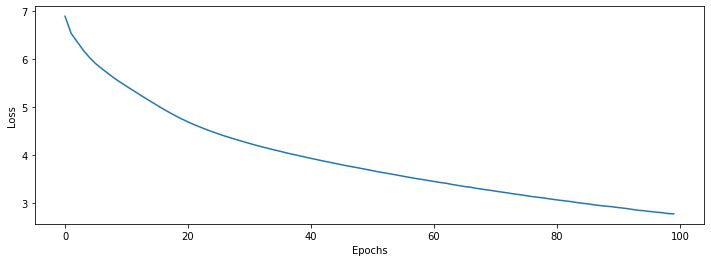

In [ ]:
import matplotlib.pyplot as plt

losses_lstm = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(losses_lstm)),losses_lstm);

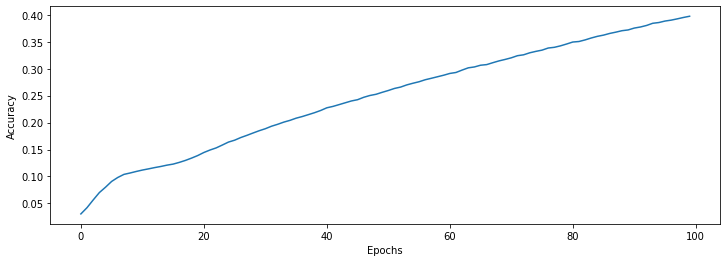

In [ ]:
losses_lstm = model.history.history['accuracy']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(len(losses_lstm)),losses_lstm);

We are now going to generate words using the model. 

For this we need a set of 50 words to predict the 51st word. 

So we are taking a random line.



In [ ]:
model.save('shakespeare_bot.h5')

In [25]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/shakespeare.h5

--2021-12-12 20:40:29--  https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/shakespeare.h5
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.118
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25437020 (24M) [application/octet-stream]
Saving to: ‘shakespeare.h5’

shakespeare.h5      100%[===================>]  24.26M  17.1MB/s    in 1.4s    

2021-12-12 20:40:31 (17.1 MB/s) - ‘shakespeare.h5’ saved [25437020/25437020]



In [26]:
from tensorflow.keras.models import load_model
model = load_model('shakespeare.h5')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            650450    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 13009)             1313909   
                                                                 
Total params: 2,115,259
Trainable params: 2,115,259
Non-trainable params: 0
_________________________________________________________________


In [28]:
seed_text=lines[12343]
seed_text

'home of love if i have ranged like him that travels i return again just to the time not with the time exchanged so that my self bring water for my stain never believe though in my nature reigned all frailties that besiege all kinds of blood that it could so'

generate_text_seq() generates n_words number of words after the given seed_text. We are going to pre-process the seed_text before predicting. We are going to encode the seed_text using the same encoding used for encoding the training data. Then we are going to convert the seed_textto 50 words by using pad_sequences(). Now we will predict using model.predict_classes(). After that we will search the word in tokenizer using the index in y_predict. Finally we will append the predicted word to seed_text and text and repeat the process.

In [33]:
def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
  text = []

  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen = text_seq_length, truncating='pre')

    y_predict = model.predict(encoded)
    y_predict=np.argmax(y_predict,axis=1)

    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if index == y_predict:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    text.append(predicted_word)
  return ' '.join(text)

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/bot.png" width="1200">

In [34]:
#We can see that the next 100 words are predicted by the model for the seed_text.
text_generated = generate_text_seq(model, tokenizer, seq_length, seed_text, 100)
text_generated

'preposterously be stained to come by thine the adornment of my body thy elder servant to me borne stealing on thy beloved and they come to strong that can become a tomb so dangerous and seldom as the world bears players age and earth to keep away to deny them from marriage i will convey that dream in all all all things hath turnd the flushing of life to die and poison short to the utmost carat the invisible tigers extemporally will not continue but for a cardecue the heir of your haters i have to swoon i will speak'

## Text To Speech

Google Text-to-Speech), a Python library and CLI tool to interface with Google Translate's text-to-speech API

In [35]:
!pip install gTTS --quiet

In [36]:
from gtts import gTTS
from IPython.display import Audio
tts = gTTS(text_generated)
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/tenor.gif" width="350">